# Salary Prediction with Linear Regression

#### İş Problemi

Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol
oyuncularının maaş tahminleri için bir makine öğrenmesi modeli geliştiriniz.

#### Veri Seti Hikayesi

Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan
StatLib kütüphanesinden alınmıştır. Veri seti 1988 ASA Grafik Bölümü
Poster Oturumu'nda kullanılan verilerin bir parçasıdır. Maaş verileri
orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır. 1986 ve
kariyer istatistikleri, Collier Books, Macmillan Publishing Company,
New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi
Güncellemesinden elde edilmiştir

## 1- İmporting Libraries and Set Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_csv('hitters.csv')

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


## 2- Data Preprocessing

In [4]:
# Eksik veri sayıları
missing_data = df.isnull().sum()

# Eksik verilerin oranları
missing_data_rate = (df.isnull().sum() / len(df)) * 100

# Eksik veri analizi sonuçları
missing_data_analyze = pd.concat([missing_data, missing_data_rate], axis=1, keys=['Missing Data Count', 'Missing Data Rate'])
print(missing_data_analyze)

           Missing Data Count  Missing Data Rate
AtBat                       0              0.000
Hits                        0              0.000
HmRun                       0              0.000
Runs                        0              0.000
RBI                         0              0.000
Walks                       0              0.000
Years                       0              0.000
CAtBat                      0              0.000
CHits                       0              0.000
CHmRun                      0              0.000
CRuns                       0              0.000
CRBI                        0              0.000
CWalks                      0              0.000
League                      0              0.000
Division                    0              0.000
PutOuts                     0              0.000
Assists                     0              0.000
Errors                      0              0.000
Salary                     59             18.323
NewLeague           

In [5]:
df.dropna(inplace=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A


<Axes: xlabel='Salary', ylabel='Density'>

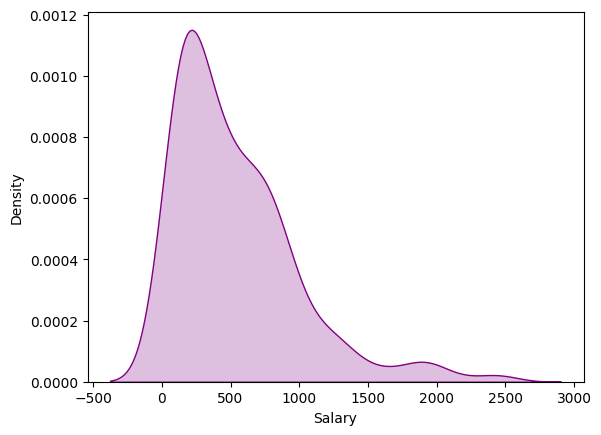

In [6]:
sns.kdeplot(df['Salary'], fill=True, color='purple')

In [7]:
# Tüm sayısal özellikleri seç
sayisal_ozellikler = df.select_dtypes(include=['float64', 'int64']).columns

# Standardizasyon
scaler = StandardScaler()
df[sayisal_ozellikler] = scaler.fit_transform(df[sayisal_ozellikler])

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-0.603,-0.596,-0.529,-1.206,-0.522,-0.098,1.398,0.347,0.174,-0.003,-0.122,0.259,0.435,N,W,1.221,-0.523,0.213,-0.135,N
2,0.513,0.492,0.730,0.442,0.794,1.609,-0.901,-0.453,-0.410,-0.076,-0.415,-0.200,0.010,A,W,2.109,-0.254,0.820,-0.124,A
3,0.628,0.736,0.959,0.402,1.026,-0.190,0.771,1.302,1.318,1.899,1.412,1.573,0.356,N,E,-0.325,-0.744,-0.848,-0.080,N
4,-0.562,-0.462,-0.185,-0.618,-0.367,-0.513,-1.110,-0.991,-0.960,-0.698,-0.948,-0.881,-0.862,N,E,1.841,-0.544,-0.697,-0.987,N
5,1.295,1.358,-0.872,0.755,-0.019,-0.282,0.771,0.767,0.635,-0.612,0.423,0.017,-0.251,A,W,-0.031,2.087,2.488,0.475,A


In [8]:
# Tüm kategorik değişkenleri seç
kategorik_degiskenler = df.select_dtypes(include=['object']).columns

# LabelEncoder oluştur
label_encoder = LabelEncoder()

# Her bir kategorik değişkeni dönüştür
for degisken in kategorik_degiskenler:
    df[degisken] = label_encoder.fit_transform(df[degisken])

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-0.603,-0.596,-0.529,-1.206,-0.522,-0.098,1.398,0.347,0.174,-0.003,-0.122,0.259,0.435,1,1,1.221,-0.523,0.213,-0.135,1
2,0.513,0.492,0.730,0.442,0.794,1.609,-0.901,-0.453,-0.410,-0.076,-0.415,-0.200,0.010,0,1,2.109,-0.254,0.820,-0.124,0
3,0.628,0.736,0.959,0.402,1.026,-0.190,0.771,1.302,1.318,1.899,1.412,1.573,0.356,1,0,-0.325,-0.744,-0.848,-0.080,1
4,-0.562,-0.462,-0.185,-0.618,-0.367,-0.513,-1.110,-0.991,-0.960,-0.698,-0.948,-0.881,-0.862,1,0,1.841,-0.544,-0.697,-0.987,1
5,1.295,1.358,-0.872,0.755,-0.019,-0.282,0.771,0.767,0.635,-0.612,0.423,0.017,-0.251,0,1,-0.031,2.087,2.488,0.475,0


In [9]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

## 3- Create LinearRegression Model

In [11]:
# Eğitim seti üzerinde Lineer Regresyon modeli oluşturma
model = LinearRegression()
model.fit(X_train, y_train)

b = model.intercept_
w = model.coef_

print("Intercept:", b)
print("Coefficients:", w)

Intercept: 0.12346141866996721
Coefficients: [-0.73213359  0.8969361   0.00684016 -0.18309082 -0.04489945  0.29525692
 -0.07145941 -0.66471722  0.01723047  0.29719963  1.02592115  0.36634543
 -0.43725294  0.11101671 -0.27596542  0.14950258  0.17183781 -0.1055774
 -0.02485556]


## 4- Model Evaluation

In [12]:
y_pred = model.predict(X_test)

In [13]:
mean_squared_error(y_test, y_pred)

0.47962311162468274

In [14]:
r2_score(y_test, y_pred)

0.4392386158378935

In [15]:
# R-kare skorunu kullanarak 10 katlı çapraz doğrulama yapın
cv_scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(r2_score))

# Elde edilen R-kare skorlarını göster
print("10 katlı Çapraz Doğrulama R-kare Skorları:")
print(cv_scores)

# Ortalama R-kare skorunu göster
mean_r2_score = cv_scores.mean()
print("Ortalama R-kare Skoru:", mean_r2_score)

10 katlı Çapraz Doğrulama R-kare Skorları:
[-0.22576496  0.70859699  0.61275432  0.55898345  0.67577269  0.65013972
 -0.01347951  0.00291959 -0.14035805  0.41614928]
Ortalama R-kare Skoru: 0.3245713522246279
